In [0]:
pip install spacy

Python interpreter will be restarted.
You should consider upgrading via the '/local_disk0/.ephemeral_nfs/envs/pythonEnv-24fd53cd-81b5-41e3-beac-6e65dae6248b/bin/python -m pip install --upgrade pip' command.
Python interpreter will be restarted.


In [0]:
pip install -U spacy

Python interpreter will be restarted.
You should consider upgrading via the '/local_disk0/.ephemeral_nfs/envs/pythonEnv-24fd53cd-81b5-41e3-beac-6e65dae6248b/bin/python -m pip install --upgrade pip' command.
Python interpreter will be restarted.


In [0]:
pip install https://github.com/explosion/spacy-models/releases/download/en_core_web_lg-3.2.0/en_core_web_lg-3.2.0.tar.gz --no-deps

Python interpreter will be restarted.
  Created wheel for en-core-web-lg: filename=en_core_web_lg-3.2.0-py3-none-any.whl size=777382776 sha256=d87f28b8fbe24beb2bd4bee11f957d0409499593ef2937d357437c4c22c60462
  Stored in directory: /root/.cache/pip/wheels/10/c2/4f/56e77f2df36a0c65d5e43059faea3fc58f44847d324e2f9220
Successfully built en-core-web-lg
You should consider upgrading via the '/local_disk0/.ephemeral_nfs/envs/pythonEnv-24fd53cd-81b5-41e3-beac-6e65dae6248b/bin/python -m pip install --upgrade pip' command.
Python interpreter will be restarted.


In [0]:
pip install nltk

Python interpreter will be restarted.
  Using cached nltk-3.6.7-py3-none-any.whl (1.5 MB)
  Using cached regex-2021.11.10-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (764 kB)
You should consider upgrading via the '/local_disk0/.ephemeral_nfs/envs/pythonEnv-24fd53cd-81b5-41e3-beac-6e65dae6248b/bin/python -m pip install --upgrade pip' command.
Python interpreter will be restarted.


In [0]:
# import libraries
import en_core_web_lg
import pandas as pd
import re
import random
import spacy
from spacy.util import minibatch, compounding
import warnings
import matplotlib.pyplot as plt
import nltk

In [0]:
from nltk import word_tokenize, pos_tag
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
Out[2]: True

In [0]:
DF = (spark.read
      .option("inferSchema", True).json("/FileStore/tables/Project_Data_Extract/Aspect_Dashboard/reviews_aspect_keywordsentiment.json"))

In [0]:
spark.conf.set("spark.sql.execution.arrow.enabled", "false") 
reviews_pdf=DF.toPandas()
reviews_pdf

,Aspect,Aspect Keywords,Aspect Sentiment,business_id,cool,date,funny,month,stars,text_syntatics_cleaned,useful
0,"[RESTAURANT#GENERAL, SERVICE#GENERAL, RESTAURA...","[barbeque place town meat side fantastic doe, ...","[positive, neutral, positive]",YZs1gNSh_sN8JmN_nrpxeA,0,2019-01-10,0,1,5.0,one favorite barbeque place town meat side fan...,0
1,"[FOOD#QUALITY, SERVICE#GENERAL, RESTAURANT#GEN...","[rate food, minute waitress, would back, drink...","[neutral, neutral, neutral, neutral, neutral, ...",gGvNgShksetPoimyKV8I9Q,0,2019-01-10,0,1,1.0,rate food whatever walked seated waited minute...,0
2,"[RESTAURANT#GENERAL, SERVICE#GENERAL, AMBIENCE...","[author's_note easy spot, grab quick bite, res...","[positive, neutral, positive, negative, neutra...",ttZRucfe1fcN_DX2ZGZ1Vg,0,2019-01-14,0,1,3.0,restaurant conveniently located street fox wa ...,0
3,"[SERVICE#GENERAL, RESTAURANT#GENERAL, FOOD#QUA...","[food star service star, average star, really ...","[neutral, neutral, positive, negative, positiv...",qDyZQ6mT1JajQ7_Yj7PeLw,1,2019-01-03,0,1,4.0,food star service star I going average star re...,1
4,None,"[wrong size, worker wa]","[negative, neutral]",Y2cj0TQvfSdRU3H55CkEgA,0,2019-01-02,0,1,1.0,service wa awful charged wrong size informed w...,0
...,...,...,...,...,...,...,...,...,...,...,...
1162424,None,"[place legit funky, monkey french toast, duo b...","[negative, neutral, neutral, neutral, positive...",O1pWzMvVmBomQUaZ3aUlLw,1,2020-12-30,0,12,5.0,place legit funky monkey french toast duo benn...,1
1162425,None,"[tiramisu strawberry cheese cakeit, staff wa, ...","[neutral, neutral, neutral, positive]",HpiE8X3s8xRRRihjp7_IMA,0,2020-11-24,0,11,5.0,place amazing whatever ate tiramisu strawberry...,0
1162426,None,"[patron toc, would good, idea order chinese ch...","[neutral, positive, neutral, positive, neutral...",kwHcdJttuelU1TTZVDovbw,0,2020-12-25,0,12,5.0,family longtime patron toc whatever decided wo...,0
1162427,None,"[pizza neighborhood, crust moderate amount]","[neutral, neutral]",gEQxTJDoJYaW0l_6FYtf8g,0,2020-12-05,0,12,5.0,best pizza neighborhood love crust moderate am...,1


### Generating Food Data

In [0]:
food_DF = (spark.read
      .option("inferSchema", True).csv("/FileStore/tables/Project_Data_Extract/Food_Dashboard/FoodData_Central_branded_food.csv"))
food_df=food_DF.toPandas()
food_df=food_df.rename(columns={'_c0': 'description'}).iloc[1:]
food_df

,description
1,"GRANOLA, CINNAMON, RAISIN, CINNAMON, RAISIN"
2,SUPREME BASMATI RICE
3,"""ORIGINAL SWEET & SMOKY BAR """"""""B"""""""" """"""""Q""""""..."
4,"EGGS, EGG SHAPED BUBBLE GUM FILLED WITH EXTRA ..."
5,"DUBBLE BUBBLE, BUBBLE GUM"
...,...
373893,Manuka Hunters Bush Honey 250g
373894,Manuka Hunters Bush Honey 500g
373895,Manuka Hunters Bush Honey 1kg
373896,Rocket Fuel Sauce 300g


In [0]:
# diaqualify foods with special characters, lowercase and extract results from "description" column
foods = food_df[food_df["description"].str.contains("[^a-zA-Z ]") == False]["description"].apply(lambda food: food.lower())

# filter out foods with more than 3 words, drop any duplicates
foods = foods[foods.str.split().apply(len) <= 3].drop_duplicates()

# print the remaining size
foods.size


Out[6]: 28276

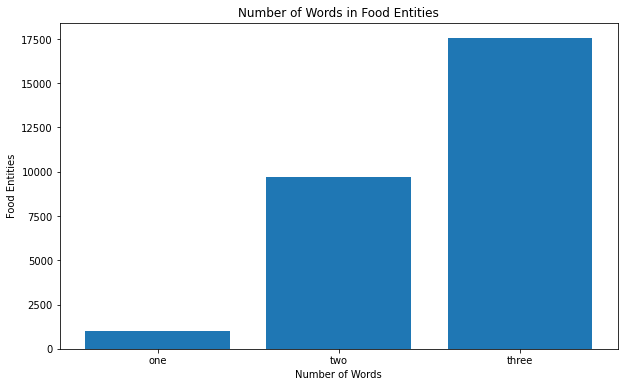

In [0]:
# print the size 
food_df["description"].size# find one-worded, two-worded and three-worded foods
one_worded_foods = foods[foods.str.split().apply(len) == 1]
two_worded_foods = foods[foods.str.split().apply(len) == 2]
three_worded_foods = foods[foods.str.split().apply(len) == 3]

# create a bar plot
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar([1, 2, 3], [one_worded_foods.size, two_worded_foods.size, three_worded_foods.size])

# label the x-axis instances
ax.set_xticks([1, 2, 3])
ax.set_xticklabels(["one", "two", "three"])

# set the title and the xy-axis labels
plt.title("Number of Words in Food Entities")
plt.xlabel("Number of Words")
plt.ylabel("Food Entities")

# display the plot
plt.show()

In [0]:
# total number of foods
total_num_foods = round(one_worded_foods.size / 45 * 100)

# shuffle the 2-worded and 3-worded foods since we'll be slicing them
two_worded_foods = two_worded_foods.sample(frac=1)
three_worded_foods = three_worded_foods.sample(frac=1)

# append the foods together 
foods = one_worded_foods.append(two_worded_foods[:round(total_num_foods * 0.30)]).append(three_worded_foods[:round(total_num_foods * 0.25)])

# print the resulting sizes
for i in range(3):
    print(f"{i+1}-worded food entities:", foods[foods.str.split().apply(len) == i + 1].size)

1-worded food entities: 1024
2-worded food entities: 683
3-worded food entities: 569


### Split train and test food data

In [0]:
food_templates = [
    "I ate my {}",
    "I'm eating a {}",
    "I just ate a {}",
    "I only ate the {}",
    "I'm done eating a {}",
    "I've already eaten a {}",
    "I just finished my {}",
    "When I was having lunch I ate a {}",
    "I had a {} and a {} today",
    "I ate a {} and a {} for lunch",
    "I made a {} and {} for lunch",
    "I ate {} and {}",
    "today I ate a {} and a {} for lunch",
    "I had {} with my husband last night",
    "I brought you some {} on my birthday",
    "I made {} for yesterday's dinner",
    "last night, a {} was sent to me with {}",
    "I had {} yesterday and I'd like to eat it anyway",
    "I ate a couple of {} last night",
    "I had some {} at dinner last night",
    "Last night, I ordered some {}",
    "I made a {} last night",
    "I had a bowl of {} with {} and I wanted to go to the mall today",
    "I brought a basket of {} for breakfast this morning",
    "I had a bowl of {}",
    "I ate a {} with {} in the morning",
    "I made a bowl of {} for my breakfast",
    "There's {} for breakfast in the bowl this morning",
    "This morning, I made a bowl of {}",
    "I decided to have some {} as a little bonus",
    "I decided to enjoy some {}",
    "I've decided to have some {} for dessert",
    "I had a {}, a {} and {} at home",
    "I took a {}, {} and {} on the weekend",
    "I ate a {} with {} and {} just now",
    "Last night, I ate an {} with {} and {}",
    "I tasted some {}, {} and {} at the office",
    "There's a basket of {}, {} and {} that I consumed",
    "I devoured a {}, {} and {}",
    "I've already had a bag of {}, {} and {} from the fridge"
]

In [0]:
# create dictionaries to store the generated food combinations. Do note that one_food != one_worded_food. one_food == "barbecue sauce", one_worded_food == "sauce"
TRAIN_FOOD_DATA = {
    "one_food": [],
    "two_foods": [],
    "three_foods": []
}

TEST_FOOD_DATA = {
    "one_food": [],
    "two_foods": [],
    "three_foods": []
}

# one_food, two_food, and three_food combinations will be limited to 167 sentences
FOOD_SENTENCE_LIMIT = 167

# helper function for deciding what dictionary and subsequent array to append the food sentence on to
def get_food_data(count):
    return {
        1: TRAIN_FOOD_DATA["one_food"] if len(TRAIN_FOOD_DATA["one_food"]) < FOOD_SENTENCE_LIMIT else TEST_FOOD_DATA["one_food"],
        2: TRAIN_FOOD_DATA["two_foods"] if len(TRAIN_FOOD_DATA["two_foods"]) < FOOD_SENTENCE_LIMIT else TEST_FOOD_DATA["two_foods"],
        3: TRAIN_FOOD_DATA["three_foods"] if len(TRAIN_FOOD_DATA["three_foods"]) < FOOD_SENTENCE_LIMIT else TEST_FOOD_DATA["three_foods"],
    }[count]

# the pattern to replace from the template sentences
pattern_to_replace = "{}"

# shuffle the data before starting
foods = foods.sample(frac=1)

# the count that helps us decide when to break from the for loop
food_entity_count = foods.size - 1

# start the while loop, ensure we don't get an index out of bounds error
while food_entity_count >= 2:
    entities = []

    # pick a random food template
    sentence = food_templates[random.randint(0, len(food_templates) - 1)]

    # find out how many braces "{}" need to be replaced in the template
    matches = re.findall(pattern_to_replace, sentence)

    # for each brace, replace with a food entity from the shuffled food data
    for match in matches:
        food = foods.iloc[food_entity_count]
        food_entity_count -= 1

        # replace the pattern, but then find the match of the food entity we just inserted
        sentence = sentence.replace(match, food, 1)
        match_span = re.search(food, sentence).span()

        # use that match to find the index positions of the food entity in the sentence, append
        entities.append((match_span[0], match_span[1], "FOOD"))

    # append the sentence and the position of the entities to the correct dictionary and array
    get_food_data(len(matches)).append((sentence, {"entities": entities}))


In [0]:
# print the number of food sentences, as well as an example sentence
for key in TRAIN_FOOD_DATA:
    print("{} {} sentences: {}".format(len(TRAIN_FOOD_DATA[key]), key, TRAIN_FOOD_DATA[key][0]))

167 one_food sentences: ('I decided to enjoy some pure clover whipped', {'entities': [(24, 43, 'FOOD')]})
167 two_foods sentences: ('today I ate a wafers and a cadbury heroes chocolate for lunch', {'entities': [(14, 20, 'FOOD'), (27, 51, 'FOOD')]})
167 three_foods sentences: ("I've already had a bag of oats, swiss muesli and brioche from the fridge", {'entities': [(26, 30, 'FOOD'), (32, 44, 'FOOD'), (49, 56, 'FOOD')]})


In [0]:
for key in TEST_FOOD_DATA:
    print("{} {} items: {}".format(len(TEST_FOOD_DATA[key]), key, TEST_FOOD_DATA[key][0]))

627 one_food items: ("I've already eaten a macarons", {'entities': [(21, 29, 'FOOD')]})
106 two_foods items: ('last night, a ice was sent to me with piccante', {'entities': [(14, 17, 'FOOD'), (38, 46, 'FOOD')]})
145 three_foods items: ('I ate a cauliflower puree with oatmilk and cashews just now', {'entities': [(8, 25, 'FOOD'), (31, 38, 'FOOD'), (43, 50, 'FOOD')]})


In [0]:
nlp = en_core_web_lg.load()
# display sentences involving target entity
spacy.displacy.render(nlp("I had a hamburger and chips for lunch today."), style="ent")
spacy.displacy.render(nlp("I decided to have chocolate ice cream as a little treat for myself."), style="ent")
spacy.displacy.render(nlp("I ordered basmati rice, leaf spinach and cheese from Tesco yesterday"), style="ent")

I had a hamburger and chips for lunch 
 
 today
 DATE 
 
.

/local_disk0/.ephemeral_nfs/envs/pythonEnv-24fd53cd-81b5-41e3-beac-6e65dae6248b/lib/python3.8/site-packages/spacy/displacy/__init__.py:200: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  warnings.warn(Warnings.W006)


I decided to have chocolate ice cream as a little treat for myself.

I ordered basmati rice, leaf spinach and cheese from 
 
 Tesco
 ORG 
 
 
 
 yesterday
 DATE

In [0]:
import pandas as pd

url = "https://github.com/milkha/FBElec16/blob/master/data/npr.csv"
df = pd.read_csv(url, index_col=0, sep='delimiter', header=None)
print(df.head(5))

<command-4229277534970582>:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv(url, index_col=0, sep='delimiter', header=None)
Empty DataFrame
Columns: []
Index: [<!DOCTYPE html>, <html lang="en" data-color-mode="auto" data-light-theme="light" data-dark-theme="dark">, <head>, <meta charset="utf-8">, <link rel="dns-prefetch" href="https://github.githubassets.com">]


### Generating Revision Data

In [0]:
npr_DF = (spark.read
      .option("inferSchema", True).csv("/FileStore/tables/Project_Data_Extract/Food_Dashboard/npr.csv"))
npr_df=npr_DF.toPandas()
npr_df=npr_df.rename(columns={'_c0': 'Article'}).iloc[1:]
npr_df

,Article
1,"In the Washington of 2016, even when the polic..."
2,Donald Trump has used Twitter — his prefe...
3,Donald Trump is unabashedly praising Russian...
4,"Updated at 2:50 p. m. ET, Russian President Vl..."
5,"From photography, illustration and video, to d..."
...,...
11988,The number of law enforcement officers shot an...
11989,"Trump is busy these days with victory tours,..."
11990,It’s always interesting for the Goats and Soda...
11991,The election of Donald Trump was a surprise to...


In [0]:
# create an nlp object as we'll use this to seperate the sentences and identify existing entities
nlp = en_core_web_lg.load()

In [0]:
revision_texts = []

# convert the articles to spacy objects to better identify the sentences. Disabled unneeded components. # takes ~ 4 minutes
for doc in nlp.pipe(npr_df["Article"][:6000], batch_size=30, disable=["tagger", "ner"]):
    for sentence in doc.sents:
        if  40 < len(sentence.text) < 80:
            # some of the sentences had excessive whitespace in between words, so we're trimming that
            revision_texts.append(" ".join(re.split("\s+", sentence.text, flags=re.UNICODE)))

/local_disk0/.ephemeral_nfs/envs/pythonEnv-24fd53cd-81b5-41e3-beac-6e65dae6248b/lib/python3.8/site-packages/spacy/pipeline/lemmatizer.py:211: UserWarning: [W108] The rule-based lemmatizer did not find POS annotation for one or more tokens. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
  warnings.warn(Warnings.W108)


In [0]:
revisions = []

# Use the existing spaCy model to predict the entities, then append them to revision
for doc in nlp.pipe(revision_texts, batch_size=50, disable=["tagger", "parser"]):
    
    # don't append sentences that have no entities
    if len(doc.ents) > 0:
        revisions.append((doc.text, {"entities": [(e.start_char, e.end_char, e.label_) for e in doc.ents]}))

### Split train and test revision data

In [0]:
# print an example of the revision sentence
print(revisions[0][0])

# print an example of the revision data
print(revisions[0][1])

And in that sense, this year shows little sign of ending on Dec. 31.
{'entities': [(19, 28, 'DATE'), (60, 67, 'DATE')]}


In [0]:
# create arrays to store the revision data
TRAIN_REVISION_DATA = []
TEST_REVISION_DATA = []

# create dictionaries to keep count of the different entities
TRAIN_ENTITY_COUNTER = {}
TEST_ENTITY_COUNTER = {}

# This will help distribute the entities (i.e. we don't want 1000 PERSON entities, but only 80 ORG entities)
REVISION_SENTENCE_SOFT_LIMIT = 100

# helper function for incrementing the revision counters
def increment_revision_counters(entity_counter, entities):
    for entity in entities:
        label = entity[2]
        if label in entity_counter:
            entity_counter[label] += 1
        else:
            entity_counter[label] = 1

random.shuffle(revisions)
for revision in revisions:
    # get the entities from the revision sentence
    entities = revision[1]["entities"]

    # simple hack to make sure spaCy entities don't get too one-sided
    should_append_to_train_counter = 0
    for _, _, label in entities:
        if label in TRAIN_ENTITY_COUNTER and TRAIN_ENTITY_COUNTER[label] > REVISION_SENTENCE_SOFT_LIMIT:
            should_append_to_train_counter -= 1
        else:
            should_append_to_train_counter += 1

    # simple switch for deciding whether to append to train data or test data
    if should_append_to_train_counter >= 0:
        TRAIN_REVISION_DATA.append(revision)
        increment_revision_counters(TRAIN_ENTITY_COUNTER, entities)
    else:
        TEST_REVISION_DATA.append(revision)
        increment_revision_counters(TEST_ENTITY_COUNTER, entities)

In [0]:
TRAIN_ENTITY_COUNTER

Out[21]: {'QUANTITY': 101,
 'PERCENT': 101,
 'MONEY': 105,
 'ORG': 179,
 'PERSON': 267,
 'DATE': 206,
 'GPE': 164,
 'ORDINAL': 108,
 'NORP': 131,
 'CARDINAL': 169,
 'LOC': 102,
 'TIME': 105,
 'FAC': 101,
 'WORK_OF_ART': 104,
 'LAW': 69,
 'PRODUCT': 102,
 'EVENT': 101,
 'LANGUAGE': 57}

In [0]:
TEST_ENTITY_COUNTER

Out[22]: {'PERSON': 11947,
 'ORDINAL': 973,
 'ORG': 8214,
 'GPE': 5159,
 'DATE': 6284,
 'CARDINAL': 4644,
 'QUANTITY': 93,
 'NORP': 2309,
 'LOC': 445,
 'FAC': 150,
 'PRODUCT': 124,
 'PERCENT': 435,
 'MONEY': 459,
 'TIME': 604,
 'WORK_OF_ART': 304,
 'EVENT': 68,
 'LANGUAGE': 17,
 'LAW': 11}

### Training NER model

In [0]:
# combine the food training data
TRAIN_FOOD_DATA_COMBINED = TRAIN_FOOD_DATA["one_food"] + TRAIN_FOOD_DATA["two_foods"] + TRAIN_FOOD_DATA["three_foods"]

# print the length of the food training data
print("FOOD", len(TRAIN_FOOD_DATA_COMBINED))

# print the length of the revision training data
print("REVISION", len(TRAIN_REVISION_DATA))

# join and print the combined length
TRAIN_DATA = TRAIN_REVISION_DATA + TRAIN_FOOD_DATA_COMBINED
print("COMBINED", len(TRAIN_DATA))

FOOD 501
REVISION 1439
COMBINED 1940


In [0]:
from spacy.training import Example
# add NER to the pipeline and the new label
ner = nlp.get_pipe("ner")
ner.add_label("FOOD")

# get the names of the components we want to disable during training
pipe_exceptions = ["ner", "trf_wordpiecer", "trf_tok2vec"]
other_pipes = [pipe for pipe in nlp.pipe_names if pipe not in pipe_exceptions]

# start the training loop, only training NER
epochs = 30
optimizer = nlp.resume_training()
with nlp.disable_pipes(*other_pipes), warnings.catch_warnings():
    warnings.filterwarnings("once", category=UserWarning, module='spacy')
    sizes = compounding(1.0, 4.0, 1.001)
    
    # batch up the examples using spaCy's minibatc
    for epoch in range(epochs):
        examples = TRAIN_DATA
        random.shuffle(examples)
        batches = minibatch(examples, size=sizes)
        losses = {}
        
        for batch in batches:
            texts, annotations = zip(*batch)
            example=[]
            for i in range(len(texts)):
                doc = nlp.make_doc(texts[i])
                example.append(Example.from_dict(doc, annotations[i]))
            #nlp.update(texts, annotations, sgd=optimizer, drop=0.35, losses=losses)
            nlp.update(example, drop=0.35,sgd=optimizer, losses=losses)

        print("Losses ({}/{})".format(epoch + 1, epochs), losses)

/local_disk0/.ephemeral_nfs/envs/pythonEnv-24fd53cd-81b5-41e3-beac-6e65dae6248b/lib/python3.8/site-packages/spacy/training/iob_utils.py:141: UserWarning: [W030] Some entities could not be aligned in the text "There's a basket of apple beverage, marinade  and ..." with entities "[(20, 34, 'FOOD'), (36, 45, 'FOOD'), (50, 54, 'FOO...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(
/local_disk0/.ephemeral_nfs/envs/pythonEnv-24fd53cd-81b5-41e3-beac-6e65dae6248b/lib/python3.8/site-packages/spacy/training/iob_utils.py:141: UserWarning: [W030] Some entities could not be aligned in the text "I took a three meat pizza, chayote and cheddar che..." with entities "[(9, 25, 'FOOD'), (27, 34, 'FOOD'), (39, 54, 'FOOD...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
 

### Evaluating the Model

In [0]:
# display sentence involving original entities
spacy.displacy.render(nlp("Apple is looking at buying U.K. startup for $1 billion"), style="ent")

Apple
 ORG 
 
 is looking at buying 
 
 U.K.
 GPE 
 
 startup for 
 
 $1 billion
 MONEY

In [0]:
# display sentences involving target entity
spacy.displacy.render(nlp("I had a hamburger and chips for lunch today."), style="ent")
spacy.displacy.render(nlp("I decided to have chocolate ice cream as a little treat for myself."), style="ent")
spacy.displacy.render(nlp("I ordered basmati rice, leaf spinach and cheese from Tesco yesterday"), style="ent")

I had a 
 
 hamburger
 FOOD 
 
 and 
 
 chips
 FOOD 
 
 for lunch 
 
 today
 DATE 
 
.

I decided to have 
 
 chocolate ice cream
 FOOD 
 
 as a little treat for myself.

I ordered 
 
 basmati rice
 FOOD 
 
, 
 
 leaf spinach
 FOOD 
 
 and cheese from 
 
 Tesco
 ORG 
 
 yesterday

In [0]:
doc=nlp("I had a hamburger and chips for lunch today.")
print([(X.text, X.label_) for X in doc.ents])

[('hamburger', 'FOOD'), ('chips', 'FOOD'), ('today', 'DATE')]


### Evaluating Food Entities

In [0]:
# dictionary to hold our evaluation data
food_evaluation = {
    "one_food": {
        "correct": 0,
        "total": 0,
    },
    "two_foods": {
        "correct": 0,
        "total": 0
    },
    "three_foods": {
        "correct": 0,
        "total": 0
    }
}

word_evaluation = {
    "1_worded_foods": {
        "correct": 0,
        "total": 0
    },
    "2_worded_foods": {
        "correct": 0,
        "total": 0
    },
    "3_worded_foods": {
        "correct": 0,
        "total": 0
    }
}

# loop over data from our test food set (3 keys in total)
for key in TEST_FOOD_DATA:
    foods = TEST_FOOD_DATA[key]

    for food in foods:
        # extract the sentence and correct food entities according to our test data
        sentence = food[0]
        entities = food[1]["entities"]

        # for each entity, use our updated model to make a prediction on the sentence
        for entity in entities:
            doc = nlp(sentence)
            correct_text = sentence[entity[0]:entity[1]]
            n_worded_food =  len(correct_text.split())

            # if we find that there's a match for predicted entity and predicted text, increment correct counters
            for ent in doc.ents:
                if ent.label_ == entity[2] and ent.text == correct_text:
                    food_evaluation[key]["correct"] += 1
                    if n_worded_food > 0:
                        word_evaluation[f"{n_worded_food}_worded_foods"]["correct"] += 1
                    
                    # this break is important, ensures that we're not double counting on a correct match
                    break
            
            #  increment total counters after each entity loop
            food_evaluation[key]["total"] += 1
            if n_worded_food > 0:
                word_evaluation[f"{n_worded_food}_worded_foods"]["total"] += 1

In [0]:
for key in word_evaluation:
    correct = word_evaluation[key]["correct"]
    total = word_evaluation[key]["total"]

    print(f"{key}: {correct / total * 100:.2f}%")

food_total_sum = 0
food_correct_sum = 0

print("---")
for key in food_evaluation:
    correct = food_evaluation[key]["correct"]
    total = food_evaluation[key]["total"]
    
    food_total_sum += total
    food_correct_sum += correct

    print(f"{key}: {correct / total * 100:.2f}%")

print(f"\nTotal: {food_correct_sum/food_total_sum * 100:.2f}%")

1_worded_foods: 89.91%
2_worded_foods: 92.53%
3_worded_foods: 96.57%
---
one_food: 90.59%
two_foods: 91.04%
three_foods: 95.63%

Total: 92.39%


### Evaluating Existing Entities

In [0]:
# dictionary which will be populated with the entities and result information
entity_evaluation = {}

# helper function to udpate the entity_evaluation dictionary
def update_results(entity, metric):
    if entity not in entity_evaluation:
        entity_evaluation[entity] = {"correct": 0, "total": 0}
    
    entity_evaluation[entity][metric] += 1

# same as before, see if entities from test set match what spaCy currently predicts
for data in TEST_REVISION_DATA:
    sentence = data[0]
    entities = data[1]["entities"]

    for entity in entities:
        doc = nlp(sentence)
        correct_text = sentence[entity[0]:entity[1]]

        for ent in doc.ents:
            if ent.label_ == entity[2] and ent.text == correct_text:
                update_results(ent.label_, "correct")
                break

        update_results(entity[2], "total")

In [0]:
sum_total = 0
sum_correct = 0

for entity in entity_evaluation:
    total = entity_evaluation[entity]["total"]
    correct = entity_evaluation[entity]["correct"]

    sum_total += total
    sum_correct += correct
    
    print("{} | {:.2f}%".format(entity, correct / total * 100))

print()
print("Overall accuracy: {:.2f}%".format(sum_correct / sum_total * 100))

PERSON | 80.37%
ORDINAL | 97.84%
ORG | 66.58%
GPE | 87.98%
DATE | 82.62%
CARDINAL | 83.85%
QUANTITY | 84.95%
NORP | 92.68%
LOC | 74.38%
FAC | 74.67%
PRODUCT | 52.42%
PERCENT | 94.71%
MONEY | 89.98%
TIME | 80.13%
WORK_OF_ART | 57.89%
EVENT | 72.06%
LANGUAGE | 100.00%
LAW | 81.82%

Overall accuracy: 80.34%


### Applying on Reviews Dataset

In [0]:
doc=nlp("I had a hamburger and chips for lunch today.")
print([(X.text, X.label_) for X in doc.ents])

[('hamburger', 'FOOD'), ('chips', 'FOOD'), ('today', 'DATE')]


In [0]:
def extract_nouns(text):
    is_noun = lambda pos: pos[:2] == 'NN'
    tokenized = word_tokenize(text)
    all_nouns = [word for (word, pos) in pos_tag(tokenized) if is_noun(pos)] 
    return ' '.join(all_nouns)

def identify_food_entity(text):
    text=extract_nouns(text)
    #print(text)
    s=[]
    doc=nlp(text)
    for X in doc.ents:
        if X.label_ == "FOOD":
            s.append(X.text)
    return s
            
print(identify_food_entity("I had a hamburger and chips for lunch today."))

['hamburger chips']


In [0]:
reviews_pdf['Food_Entities']=reviews_pdf['text_syntatics_cleaned'].head(500000).apply(identify_food_entity)
reviews_pdf

,Aspect,Aspect Keywords,Aspect Sentiment,business_id,cool,date,funny,month,stars,text_syntatics_cleaned,useful,Food_Entities
0,"[RESTAURANT#GENERAL, SERVICE#GENERAL, RESTAURA...","[barbeque place town meat side fantastic doe, ...","[positive, neutral, positive]",YZs1gNSh_sN8JmN_nrpxeA,0,2019-01-10,0,1,5.0,one favorite barbeque place town meat side fan...,0,[]
1,"[FOOD#QUALITY, SERVICE#GENERAL, RESTAURANT#GEN...","[rate food, minute waitress, would back, drink...","[neutral, neutral, neutral, neutral, neutral, ...",gGvNgShksetPoimyKV8I9Q,0,2019-01-10,0,1,1.0,rate food whatever walked seated waited minute...,0,[]
2,"[RESTAURANT#GENERAL, SERVICE#GENERAL, AMBIENCE...","[author's_note easy spot, grab quick bite, res...","[positive, neutral, positive, negative, neutra...",ttZRucfe1fcN_DX2ZGZ1Vg,0,2019-01-14,0,1,3.0,restaurant conveniently located street fox wa ...,0,"[restaurant ha selection pasta, salad chicken ..."
3,"[SERVICE#GENERAL, RESTAURANT#GENERAL, FOOD#QUA...","[food star service star, average star, really ...","[neutral, neutral, positive, negative, positiv...",qDyZQ6mT1JajQ7_Yj7PeLw,1,2019-01-03,0,1,4.0,food star service star I going average star re...,1,"[goto spot beer, spicy ramen, heat veggie flav..."
4,None,"[wrong size, worker wa]","[negative, neutral]",Y2cj0TQvfSdRU3H55CkEgA,0,2019-01-02,0,1,1.0,service wa awful charged wrong size informed w...,0,[]
...,...,...,...,...,...,...,...,...,...,...,...,...
1162424,None,"[place legit funky, monkey french toast, duo b...","[negative, neutral, neutral, neutral, positive...",O1pWzMvVmBomQUaZ3aUlLw,1,2020-12-30,0,12,5.0,place legit funky monkey french toast duo benn...,1,NaN
1162425,None,"[tiramisu strawberry cheese cakeit, staff wa, ...","[neutral, neutral, neutral, positive]",HpiE8X3s8xRRRihjp7_IMA,0,2020-11-24,0,11,5.0,place amazing whatever ate tiramisu strawberry...,0,NaN
1162426,None,"[patron toc, would good, idea order chinese ch...","[neutral, positive, neutral, positive, neutral...",kwHcdJttuelU1TTZVDovbw,0,2020-12-25,0,12,5.0,family longtime patron toc whatever decided wo...,0,NaN
1162427,None,"[pizza neighborhood, crust moderate amount]","[neutral, neutral]",gEQxTJDoJYaW0l_6FYtf8g,0,2020-12-05,0,12,5.0,best pizza neighborhood love crust moderate am...,1,NaN


In [0]:
review

In [0]:
from pyspark.sql import SparkSession
#Create PySpark SparkSession
spark = SparkSession.builder \
    .master("local[1]") \
    .appName("SparkByExamples.com") \
    .getOrCreate()
#Create PySpark DataFrame from Pandas

In [0]:
from pyspark.sql.types import *

# Auxiliar functions
def equivalent_type(f):
    if f == 'datetime64[ns]': return TimestampType()
    elif f == 'int64': return LongType()
    elif f == 'int32': return IntegerType()
    elif f == 'float64': return FloatType()
    else: return StringType()

def define_structure(string, format_type):
    try: typo = equivalent_type(format_type)
    except: typo = StringType()
    return StructField(string, typo)

# Given pandas dataframe, it will return a spark's dataframe.
def pandas_to_spark(pandas_df):
    columns = list(pandas_df.columns)
    types = list(pandas_df.dtypes)
    struct_list = []
    for column, typo in zip(columns, types): 
      struct_list.append(define_structure(column, typo))
    p_schema = StructType(struct_list)
    return sqlContext.createDataFrame(pandas_df, p_schema)

In [0]:
reviewsDF=pandas_to_spark(reviews_pdf) 
reviewsDF.coalesce(1).write.mode('overwrite').format('json').save("/FileStore/tables/Project_Data_Extract/Food_Dashboard/reviews_food_entities1.json")

In [0]:
reviewsDF.display()

In [0]:
reviews_pdf2=reviews_pdf.iloc[500000:]

In [0]:
reviews_pdf2['Food_Entities']=reviews_pdf2['text_syntatics_cleaned'].apply(identify_food_entity)
reviews_pdf2

<command-192499748604466>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews_pdf2['Food_Entities']=reviews_pdf2['text_syntatics_cleaned'].apply(identify_food_entity)


,Aspect,Aspect Keywords,Aspect Sentiment,business_id,cool,date,funny,month,stars,text_syntatics_cleaned,useful,Food_Entities
500000,None,"[eat lot, poke option, pretty limited, option ...","[neutral, neutral, positive, neutral, neutral,...",yzQjl6CaFl-1VFnDpT7cPg,0,2019-08-13,0,8,3.0,place aok eat lot poke found poke option prett...,0,[salmon tuna spicy thing chicken tofu]
500001,None,"[breakfast burger, really good, agent orange d...","[neutral, positive, neutral, positive, neutral]",CXndSDj0bichmzCpb_05jw,0,2019-08-14,0,8,5.0,breakfast burger really good agent orange drin...,0,[burger agent orange drink]
500002,None,"[great service, atlantic salmon, spinach tomat...","[positive, neutral, negative, neutral, neutral...",oT1lNFoMFb3RtjfxMrF2KA,0,2019-08-15,0,8,4.0,great service ordered atlantic salmon came spi...,0,"[salmon spinach tomato, potato side dessert, d..."
500003,None,"[nightlife terrible nothing, night club, went ...","[negative, neutral, neutral, neutral]",x21CuTNK9xBh59-2D-c9Lw,0,2019-08-05,0,8,3.0,nightlife terrible nothing going night club ma...,2,[]
500004,None,"[absolutely delicious, ordered salmon, veggie ...","[positive, neutral, neutral, positive, neutral...",yBx7egbyNAaeM2M5Ze-vww,0,2019-08-17,0,8,5.0,absolutely delicious ordered salmon veggie sti...,0,[veggie stir fry salmon]
...,...,...,...,...,...,...,...,...,...,...,...,...
1162424,None,"[place legit funky, monkey french toast, duo b...","[negative, neutral, neutral, neutral, positive...",O1pWzMvVmBomQUaZ3aUlLw,1,2020-12-30,0,12,5.0,place legit funky monkey french toast duo benn...,1,[benny lox latke habanero spork version]
1162425,None,"[tiramisu strawberry cheese cakeit, staff wa, ...","[neutral, neutral, neutral, positive]",HpiE8X3s8xRRRihjp7_IMA,0,2020-11-24,0,11,5.0,place amazing whatever ate tiramisu strawberry...,0,[place tiramisu strawberry]
1162426,None,"[patron toc, would good, idea order chinese ch...","[neutral, positive, neutral, positive, neutral...",kwHcdJttuelU1TTZVDovbw,0,2020-12-25,0,12,5.0,family longtime patron toc whatever decided wo...,0,[]
1162427,None,"[pizza neighborhood, crust moderate amount]","[neutral, neutral]",gEQxTJDoJYaW0l_6FYtf8g,0,2020-12-05,0,12,5.0,best pizza neighborhood love crust moderate am...,1,[]


In [0]:
reviewsDF=pandas_to_spark(reviews_pdf2) 
reviewsDF.coalesce(1).write.mode('overwrite').format('json').save("/FileStore/tables/Project_Data_Extract/Food_Dashboard/reviews_food_entities2.json")

In [0]:
DF = (spark.read
      .option("inferSchema", True).json("/FileStore/tables/Project_Data_Extract/Food_Dashboard/reviews_food_entities1.json"))
spark.conf.set("spark.sql.execution.arrow.enabled", "false") 
reviews_pdf1=DF.toPandas()
reviews_pdf1

,Aspect,Aspect Keywords,Aspect Sentiment,Food_Entities,business_id,cool,date,funny,month,stars,text_syntatics_cleaned,useful
0,"[RESTAURANT#GENERAL, SERVICE#GENERAL, RESTAURA...","[barbeque place town meat side fantastic doe, ...","[positive, neutral, positive]",[],YZs1gNSh_sN8JmN_nrpxeA,0,2019-01-10,0,1,5.0,one favorite barbeque place town meat side fan...,0
1,"[FOOD#QUALITY, SERVICE#GENERAL, RESTAURANT#GEN...","[rate food, minute waitress, would back, drink...","[neutral, neutral, neutral, neutral, neutral, ...",[],gGvNgShksetPoimyKV8I9Q,0,2019-01-10,0,1,1.0,rate food whatever walked seated waited minute...,0
2,"[RESTAURANT#GENERAL, SERVICE#GENERAL, AMBIENCE...","[author's_note easy spot, grab quick bite, res...","[positive, neutral, positive, negative, neutra...","[restaurant ha selection pasta, salad chicken ...",ttZRucfe1fcN_DX2ZGZ1Vg,0,2019-01-14,0,1,3.0,restaurant conveniently located street fox wa ...,0
3,"[SERVICE#GENERAL, RESTAURANT#GENERAL, FOOD#QUA...","[food star service star, average star, really ...","[neutral, neutral, positive, negative, positiv...","[goto spot beer, spicy ramen, heat veggie flav...",qDyZQ6mT1JajQ7_Yj7PeLw,1,2019-01-03,0,1,4.0,food star service star I going average star re...,1
4,None,"[wrong size, worker wa]","[negative, neutral]",[],Y2cj0TQvfSdRU3H55CkEgA,0,2019-01-02,0,1,1.0,service wa awful charged wrong size informed w...,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1162424,None,"[place legit funky, monkey french toast, duo b...","[negative, neutral, neutral, neutral, positive...",NaN,O1pWzMvVmBomQUaZ3aUlLw,1,2020-12-30,0,12,5.0,place legit funky monkey french toast duo benn...,1
1162425,None,"[tiramisu strawberry cheese cakeit, staff wa, ...","[neutral, neutral, neutral, positive]",NaN,HpiE8X3s8xRRRihjp7_IMA,0,2020-11-24,0,11,5.0,place amazing whatever ate tiramisu strawberry...,0
1162426,None,"[patron toc, would good, idea order chinese ch...","[neutral, positive, neutral, positive, neutral...",NaN,kwHcdJttuelU1TTZVDovbw,0,2020-12-25,0,12,5.0,family longtime patron toc whatever decided wo...,0
1162427,None,"[pizza neighborhood, crust moderate amount]","[neutral, neutral]",NaN,gEQxTJDoJYaW0l_6FYtf8g,0,2020-12-05,0,12,5.0,best pizza neighborhood love crust moderate am...,1


In [0]:
reviews_pdf1=reviews_pdf1.head(500000)

In [0]:
frames=[reviews_pdf1,reviews_pdf2]
reviews_pdf=pd.concat(frames)
reviews_pdf.reset_index(inplace=True)
reviews_pdf.drop(['index'],axis=1,inplace=True)




In [0]:
reviews_pdf

,Aspect,Aspect Keywords,Aspect Sentiment,Food_Entities,business_id,cool,date,funny,month,stars,text_syntatics_cleaned,useful
0,"[RESTAURANT#GENERAL, SERVICE#GENERAL, RESTAURA...","[barbeque place town meat side fantastic doe, ...","[positive, neutral, positive]",[],YZs1gNSh_sN8JmN_nrpxeA,0,2019-01-10,0,1,5.0,one favorite barbeque place town meat side fan...,0
1,"[FOOD#QUALITY, SERVICE#GENERAL, RESTAURANT#GEN...","[rate food, minute waitress, would back, drink...","[neutral, neutral, neutral, neutral, neutral, ...",[],gGvNgShksetPoimyKV8I9Q,0,2019-01-10,0,1,1.0,rate food whatever walked seated waited minute...,0
2,"[RESTAURANT#GENERAL, SERVICE#GENERAL, AMBIENCE...","[author's_note easy spot, grab quick bite, res...","[positive, neutral, positive, negative, neutra...","[restaurant ha selection pasta, salad chicken ...",ttZRucfe1fcN_DX2ZGZ1Vg,0,2019-01-14,0,1,3.0,restaurant conveniently located street fox wa ...,0
3,"[SERVICE#GENERAL, RESTAURANT#GENERAL, FOOD#QUA...","[food star service star, average star, really ...","[neutral, neutral, positive, negative, positiv...","[goto spot beer, spicy ramen, heat veggie flav...",qDyZQ6mT1JajQ7_Yj7PeLw,1,2019-01-03,0,1,4.0,food star service star I going average star re...,1
4,None,"[wrong size, worker wa]","[negative, neutral]",[],Y2cj0TQvfSdRU3H55CkEgA,0,2019-01-02,0,1,1.0,service wa awful charged wrong size informed w...,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1162424,None,"[place legit funky, monkey french toast, duo b...","[negative, neutral, neutral, neutral, positive...",[benny lox latke habanero spork version],O1pWzMvVmBomQUaZ3aUlLw,1,2020-12-30,0,12,5.0,place legit funky monkey french toast duo benn...,1
1162425,None,"[tiramisu strawberry cheese cakeit, staff wa, ...","[neutral, neutral, neutral, positive]",[place tiramisu strawberry],HpiE8X3s8xRRRihjp7_IMA,0,2020-11-24,0,11,5.0,place amazing whatever ate tiramisu strawberry...,0
1162426,None,"[patron toc, would good, idea order chinese ch...","[neutral, positive, neutral, positive, neutral...",[],kwHcdJttuelU1TTZVDovbw,0,2020-12-25,0,12,5.0,family longtime patron toc whatever decided wo...,0
1162427,None,"[pizza neighborhood, crust moderate amount]","[neutral, neutral]",[],gEQxTJDoJYaW0l_6FYtf8g,0,2020-12-05,0,12,5.0,best pizza neighborhood love crust moderate am...,1


In [0]:
reviewsDF=pandas_to_spark(reviews_pdf) 
reviewsDF.coalesce(1).write.mode('overwrite').format('json').save("/FileStore/tables/Project_Data_Extract/Food_Dashboard/reviews_food_entities.json")

In [0]:
DF = (spark.read
      .option("inferSchema", True).json("/FileStore/tables/Project_Data_Extract/Food_Dashboard/reviews_food_entities.json"))
spark.conf.set("spark.sql.execution.arrow.enabled", "false") 
reviews_pdf=DF.toPandas()
reviews_pdf

,Aspect,Aspect Keywords,Aspect Sentiment,Food_Entities,business_id,cool,date,funny,month,stars,text_syntatics_cleaned,useful
0,"[RESTAURANT#GENERAL, SERVICE#GENERAL, RESTAURA...","[barbeque place town meat side fantastic doe, ...","[positive, neutral, positive]",[],YZs1gNSh_sN8JmN_nrpxeA,0,2019-01-10,0,1,5.0,one favorite barbeque place town meat side fan...,0
1,"[FOOD#QUALITY, SERVICE#GENERAL, RESTAURANT#GEN...","[rate food, minute waitress, would back, drink...","[neutral, neutral, neutral, neutral, neutral, ...",[],gGvNgShksetPoimyKV8I9Q,0,2019-01-10,0,1,1.0,rate food whatever walked seated waited minute...,0
2,"[RESTAURANT#GENERAL, SERVICE#GENERAL, AMBIENCE...","[author's_note easy spot, grab quick bite, res...","[positive, neutral, positive, negative, neutra...","[restaurant ha selection pasta, salad chicken ...",ttZRucfe1fcN_DX2ZGZ1Vg,0,2019-01-14,0,1,3.0,restaurant conveniently located street fox wa ...,0
3,"[SERVICE#GENERAL, RESTAURANT#GENERAL, FOOD#QUA...","[food star service star, average star, really ...","[neutral, neutral, positive, negative, positiv...","[goto spot beer, spicy ramen, heat veggie flav...",qDyZQ6mT1JajQ7_Yj7PeLw,1,2019-01-03,0,1,4.0,food star service star I going average star re...,1
4,None,"[wrong size, worker wa]","[negative, neutral]",[],Y2cj0TQvfSdRU3H55CkEgA,0,2019-01-02,0,1,1.0,service wa awful charged wrong size informed w...,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1162424,None,"[place legit funky, monkey french toast, duo b...","[negative, neutral, neutral, neutral, positive...",[benny lox latke habanero spork version],O1pWzMvVmBomQUaZ3aUlLw,1,2020-12-30,0,12,5.0,place legit funky monkey french toast duo benn...,1
1162425,None,"[tiramisu strawberry cheese cakeit, staff wa, ...","[neutral, neutral, neutral, positive]",[place tiramisu strawberry],HpiE8X3s8xRRRihjp7_IMA,0,2020-11-24,0,11,5.0,place amazing whatever ate tiramisu strawberry...,0
1162426,None,"[patron toc, would good, idea order chinese ch...","[neutral, positive, neutral, positive, neutral...",[],kwHcdJttuelU1TTZVDovbw,0,2020-12-25,0,12,5.0,family longtime patron toc whatever decided wo...,0
1162427,None,"[pizza neighborhood, crust moderate amount]","[neutral, neutral]",[],gEQxTJDoJYaW0l_6FYtf8g,0,2020-12-05,0,12,5.0,best pizza neighborhood love crust moderate am...,1


In [0]:
reviewsDF=pandas_to_spark(reviews_pdf) 
reviewsDF.coalesce(1).write.mode('overwrite').format('json').save("/FileStore/tables/Project_Data_Extract/reviews_aspectKeywordSentiment_food.json")

In [0]:
DF = (spark.read
      .option("inferSchema", True).json("/FileStore/tables/Project_Data_Extract/reviews_aspectKeywordSentiment_food.json"))
spark.conf.set("spark.sql.execution.arrow.enabled", "false") 
reviews_pdf=DF.toPandas()
reviews_pdf

,Aspect,Aspect Keywords,Aspect Sentiment,Food_Entities,business_id,cool,date,funny,month,stars,text_syntatics_cleaned,useful
0,"[RESTAURANT#GENERAL, SERVICE#GENERAL, RESTAURA...","[barbeque place town meat side fantastic doe, ...","[positive, neutral, positive]",[],YZs1gNSh_sN8JmN_nrpxeA,0,2019-01-10,0,1,5.0,one favorite barbeque place town meat side fan...,0
1,"[FOOD#QUALITY, SERVICE#GENERAL, RESTAURANT#GEN...","[rate food, minute waitress, would back, drink...","[neutral, neutral, neutral, neutral, neutral, ...",[],gGvNgShksetPoimyKV8I9Q,0,2019-01-10,0,1,1.0,rate food whatever walked seated waited minute...,0
2,"[RESTAURANT#GENERAL, SERVICE#GENERAL, AMBIENCE...","[author's_note easy spot, grab quick bite, res...","[positive, neutral, positive, negative, neutra...","[restaurant ha selection pasta, salad chicken ...",ttZRucfe1fcN_DX2ZGZ1Vg,0,2019-01-14,0,1,3.0,restaurant conveniently located street fox wa ...,0
3,"[SERVICE#GENERAL, RESTAURANT#GENERAL, FOOD#QUA...","[food star service star, average star, really ...","[neutral, neutral, positive, negative, positiv...","[goto spot beer, spicy ramen, heat veggie flav...",qDyZQ6mT1JajQ7_Yj7PeLw,1,2019-01-03,0,1,4.0,food star service star I going average star re...,1
4,None,"[wrong size, worker wa]","[negative, neutral]",[],Y2cj0TQvfSdRU3H55CkEgA,0,2019-01-02,0,1,1.0,service wa awful charged wrong size informed w...,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1162424,None,"[place legit funky, monkey french toast, duo b...","[negative, neutral, neutral, neutral, positive...",[benny lox latke habanero spork version],O1pWzMvVmBomQUaZ3aUlLw,1,2020-12-30,0,12,5.0,place legit funky monkey french toast duo benn...,1
1162425,None,"[tiramisu strawberry cheese cakeit, staff wa, ...","[neutral, neutral, neutral, positive]",[place tiramisu strawberry],HpiE8X3s8xRRRihjp7_IMA,0,2020-11-24,0,11,5.0,place amazing whatever ate tiramisu strawberry...,0
1162426,None,"[patron toc, would good, idea order chinese ch...","[neutral, positive, neutral, positive, neutral...",[],kwHcdJttuelU1TTZVDovbw,0,2020-12-25,0,12,5.0,family longtime patron toc whatever decided wo...,0
1162427,None,"[pizza neighborhood, crust moderate amount]","[neutral, neutral]",[],gEQxTJDoJYaW0l_6FYtf8g,0,2020-12-05,0,12,5.0,best pizza neighborhood love crust moderate am...,1


In [0]:
reviews_pdf[reviews_pdf['business_id'].isin(['YZs1gNSh_sN8JmN_nrpxeA'])]

,Aspect,Aspect Keywords,Aspect Sentiment,Food_Entities,business_id,cool,date,funny,month,stars,text_syntatics_cleaned,useful
0,"[RESTAURANT#GENERAL, SERVICE#GENERAL, RESTAURA...","[barbeque place town meat side fantastic doe, ...","[positive, neutral, positive]",[],YZs1gNSh_sN8JmN_nrpxeA,0,2019-01-10,0,1,5.0,one favorite barbeque place town meat side fan...,0
17,None,"[flavor side, extremely disappointed, turkey w...","[neutral, negative, neutral, negative, neutral...",[side turkey wa side rice],YZs1gNSh_sN8JmN_nrpxeA,0,2019-01-09,0,1,2.0,okay expecting flavor side original black extr...,0
96,None,"[super underrated barbeque, place killer brisk...","[positive, negative, neutral, neutral]",[],YZs1gNSh_sN8JmN_nrpxeA,0,2019-01-03,0,1,4.0,super underrated barbeque place killer brisket...,0
295,None,"[place great owner, cheese corn, sausage amazing]","[positive, neutral, positive]",[mac corn sausage],YZs1gNSh_sN8JmN_nrpxeA,0,2019-01-11,0,1,5.0,great place great owner delicious mac cheese c...,0
303,None,"[line worth wait, favorite barbeque, waste tim...","[positive, positive, negative, neutral, positive]",[],YZs1gNSh_sN8JmN_nrpxeA,0,2019-01-04,0,1,5.0,long line worth wait favorite barbeque austin ...,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1072614,None,"[tried plenty, passing austin, many recommenda...","[neutral, neutral, neutral, neutral, positive,...","[terry barbeque texas, self brisket]",YZs1gNSh_sN8JmN_nrpxeA,2,2020-12-21,0,12,5.0,whatever know texas know barbeque since husban...,3
1072636,None,"[would give, would say, beef rib, wa way, food...","[neutral, neutral, neutral, neutral, positive,...","[star beef rib, food wa price]",YZs1gNSh_sN8JmN_nrpxeA,1,2020-12-07,0,12,4.0,would give star would say beef rib whatever wa...,0
1072717,None,"[speculation placeive lot good barbeque, sayth...","[positive, neutral, neutral, neutral]",[barbeque texas place pricey brisket texas],YZs1gNSh_sN8JmN_nrpxeA,0,2020-11-02,0,11,5.0,speculation placeive lot good barbeque texas I...,0
1072738,None,"[area stop get brisket terry black wa, juicies...","[negative, neutral, positive, positive, neutra...",[brisket barbeque sauce side],YZs1gNSh_sN8JmN_nrpxeA,2,2020-12-09,0,12,5.0,never come atx even area stop get brisket terr...,3


In [0]:
dbutils.fs.rm('/FileStore/tables/Project_Data_Extract/Food_Dashboard/reviews_food_entities.json',True)

Out[6]: True